In [42]:
import psycopg2
import pandas as pd
from config import DATABASE_PASSWORD

# Ustawienia połączenia z bazą danych
conn = psycopg2.connect(
    dbname='licencjat',
    user='postgres',
    password=DATABASE_PASSWORD,
    host='localhost',
    port='5432'
)

In [43]:
query = """
SELECT *
FROM trade
WHERE id_kategoria = 7438267 AND id_kraj <> 6649664
ORDER BY wartosc DESC;
"""

df = pd.read_sql_query(query, conn)

C:\Users\Dell\AppData\Local\Temp\ipykernel_12340\1964945166.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [44]:
df['data'] = pd.to_datetime(df['data'])

In [45]:
df_im = df[df['id_zmienna'] == 222].copy()
df_ex= df[df['id_zmienna'] == 220].copy()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_im_plot = df_im.groupby('id_kraj')['wartosc'].sum().sort_values(ascending=False).head(10).reset_index()
df_im_plot

,id_kraj,wartosc
0,6649910,3215122590577
1,6649862,943147576199
2,6649888,744680294943
3,6649894,729289092958
4,6649903,614958234838
5,7439975,476261533058
6,6649911,469853027550
7,6649922,440783815767
8,6649886,289740472633
9,6649884,276518807047


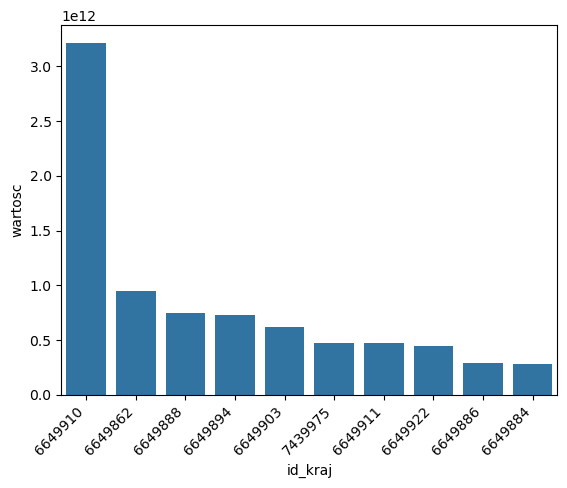

In [67]:
sns.barplot(data=df_im_plot, x='id_kraj', y='wartosc', order=df_im_plot['id_kraj'])
plt.xticks(rotation=45, ha='right')
plt.show()